# Gráficas para la presentación sobre el Titanic

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

### 0. Importaciones y dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/titanic.csv')

#### Preparación del dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [3]:
# Eliminar columnas repetidas
df.drop(columns = ['deck', 'survived', 'pclass', 'embarked'], axis = 1, inplace = True)

# Eliminar missings de age con la media por grupo de edad
who_mean = df.groupby('who')['age'].transform('mean')
df['age'] = df['age'].fillna(who_mean)

# Eliminar missings de embark_town con la moda
df.loc[df['embark_town'].isna(), 'embark_town'] = df['embark_town'].mode()[0]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          891 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  891 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### 1. Tasa de mortalidad

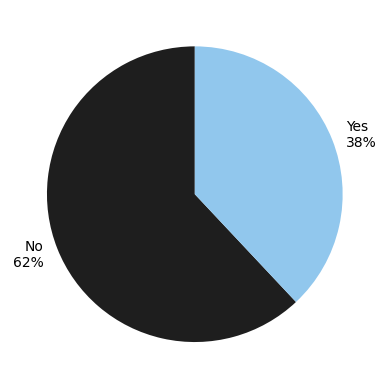

In [252]:
# Variable alive
categories = round(df['alive'].value_counts(normalize = True) * 100)
labels = [f'{i.title()}\n{value}%' for i, value in zip(categories.index, categories.values.astype(int))]
fig, ax = plt.subplots(1,1)
ax.pie(categories, labels = labels, colors = ['#1E1E1E', '#91C7ED'], startangle = 90);


### 2. who vs alive

In [394]:
def categorical_relationship(df, cat1, cat2):
    count_data = df.groupby([cat1, cat2]).size().reset_index(name = 'count')
    total = df[cat1].value_counts()
    count_data['count'] = count_data.apply(lambda x: x['count'] / total[x[cat1]] * 100, axis = 1)

    plt.figure(figsize = (10, 6))
    ax = sns.barplot(data = count_data, x = cat1, y = 'count', hue = cat2, palette = 'Paired')

    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.set_xlabel('')
    ax.yaxis.set_visible(False)

    for p in ax.patches[:(-2 if len(ax.patches) <= 8 else -3)]:
        ax.text(
            x = p.get_x() + p.get_width() / 2.,
            y = p.get_height() + 0.75,
            s = f'{p.get_height():.0f}%',
            ha = 'center',  
            va = 'bottom')
        
    plt.show()

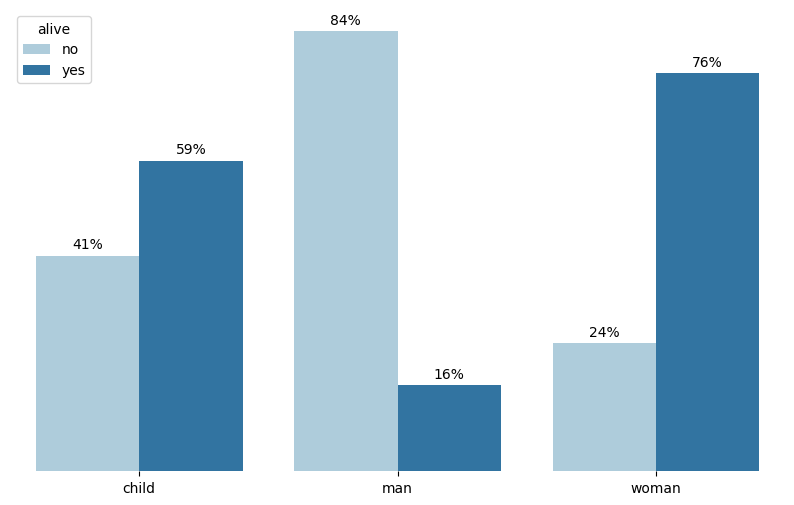

In [396]:
categorical_relationship(df, 'who', 'alive')

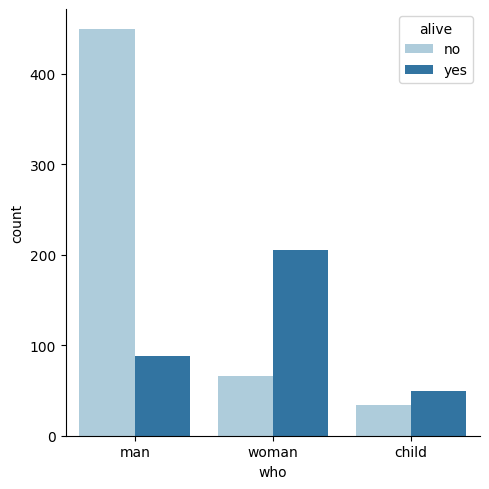

In [318]:
sns.catplot(data = df, x = 'who', hue = 'alive', palette = 'Paired', kind = 'count', legend_out = False)


In [222]:
ct = pd.crosstab(df['alive'], df['who'])
# ct = ct.sort_values(by = 'yes', ascending = False)
ct = ct.transform({
    'child': lambda x: x / sum(ct['child']) * 100,
    'man': lambda x: x / sum(ct['man']) * 100,
    'woman': lambda x: x / sum(ct['woman']) * 100
    })
ct = ct[ct.index == 'yes'].T.reset_index(names = 'who').sort_values(by = 'yes')
ct

alive,who,yes
1,man,16.387337
0,child,59.036145
2,woman,75.645756


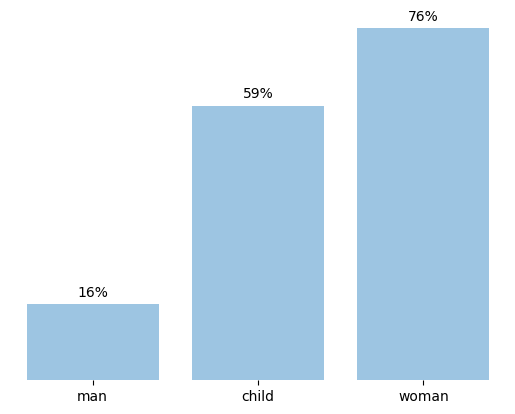

In [276]:
plt.figure()
ax = sns.barplot(data = ct, x = 'who', y = ct['yes'].values, color = '#91C7ED', legend = False)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x = p.get_x() + p.get_width() / 2.,
        y = height + 1,
        s = f'{height:.0f}%',
        ha = 'center',  
        va = 'bottom'
    )
    ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
    ax.set_xlabel('')
    ax.yaxis.set_visible(False)

### 3. Clase vs mortalidad

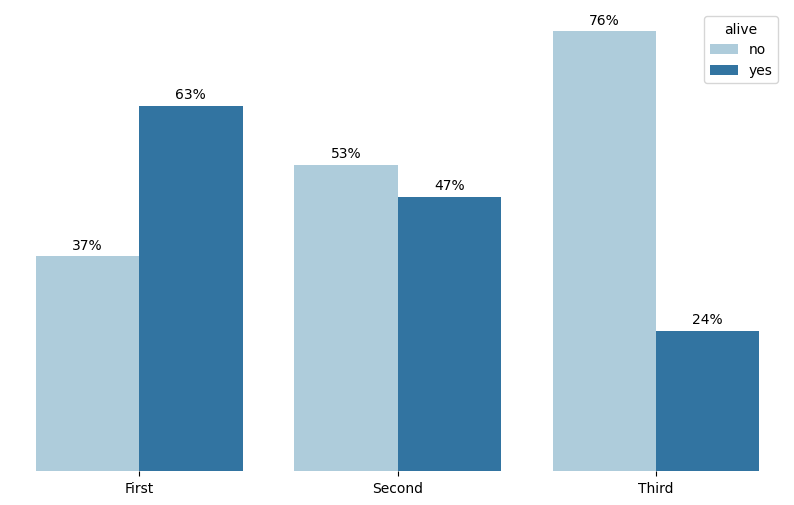

In [416]:
categorical_relationship(df, 'class', 'alive')

### 4. Mujeres / niños vs mortalidad

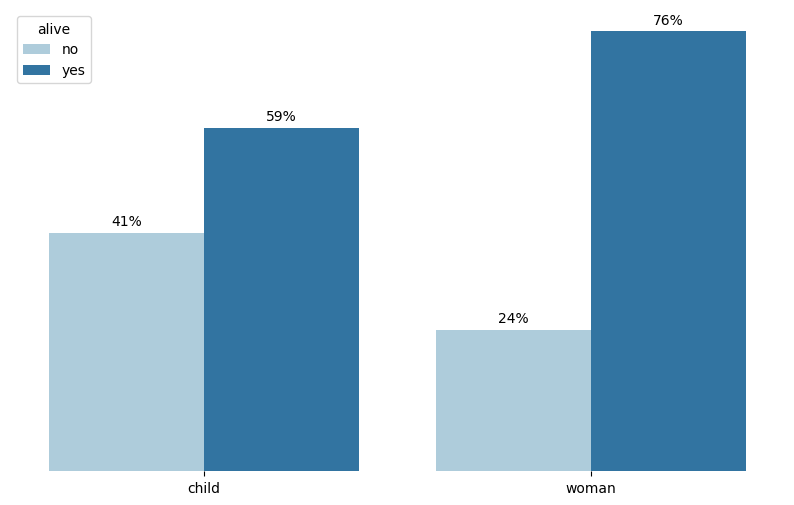

In [403]:
subset = df[df['adult_male'] == False]
categorical_relationship(subset, 'who', 'alive')

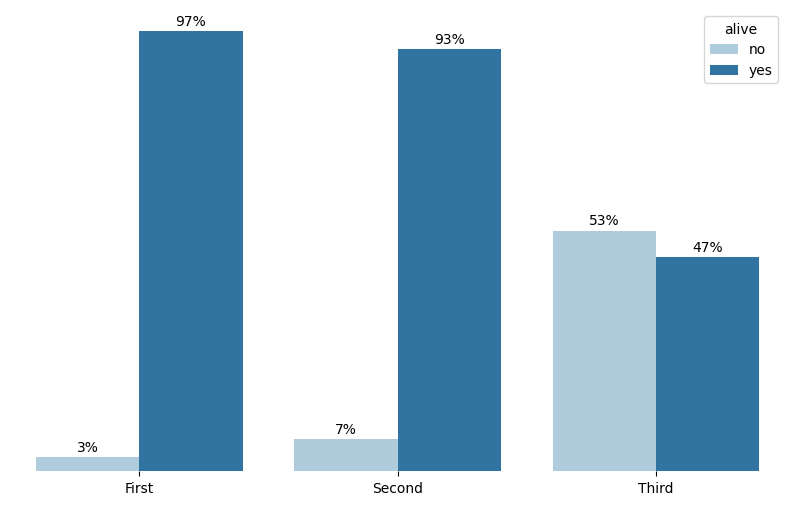

In [405]:
categorical_relationship(subset, 'class', 'alive')

### 5. Ciudad de embarque vs mortalidad

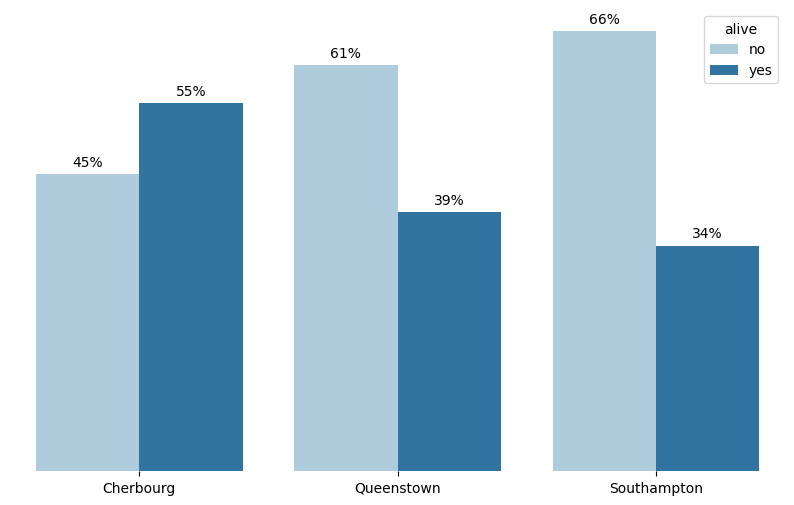

In [397]:
categorical_relationship(df, 'embark_town', 'alive')

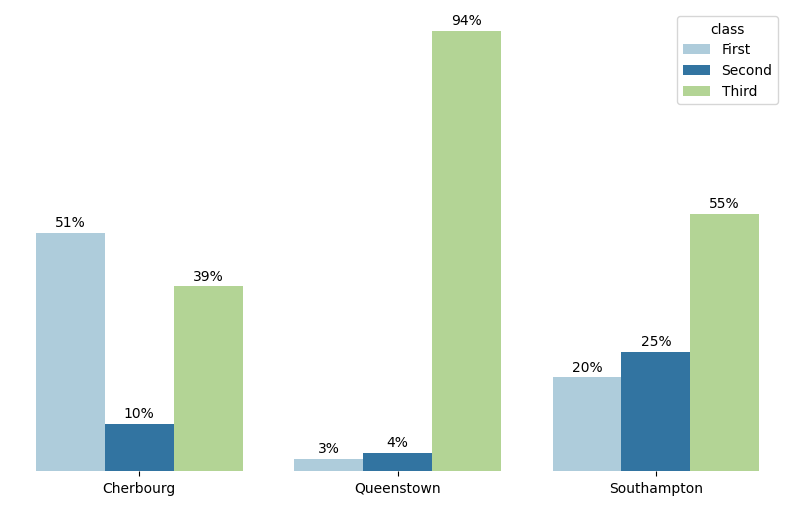

In [398]:
categorical_relationship(df, 'embark_town', 'class')

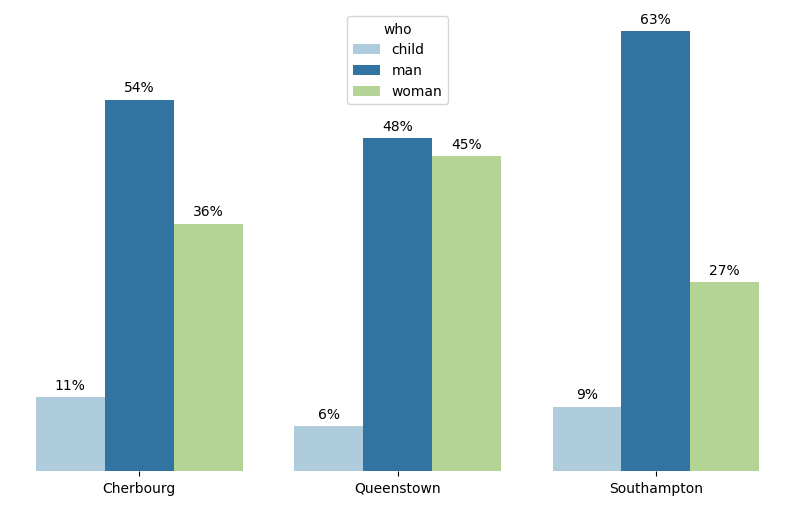

In [399]:
categorical_relationship(df, 'embark_town', 'who')